# Pymaceuticals Inc.
---

### Analysis


# Most of these drugs seem to have the same effectiveness on reducing tumors as the mean tumor volumes remained around 52-54.

# Capomulin and Ramicane seem to be the most effective at reducing tumors as there mean tumor volumes are at around 40 which is significally smaller then the other drugs.

# Sex of the mice did not seem to effect the results of the test as tumor volumes remained pretty consistent and really only differed when capomulin or Ramicane was introduced. 



- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame


# Display the data table for preview
mouse_metadata.info()
mouse_metadata

study_results.info()
study_results

merge_df = pd.merge(study_results, mouse_metadata, on="Mouse ID")
merge_df.head(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Mouse ID      249 non-null    object
 1   Drug Regimen  249 non-null    object
 2   Sex           249 non-null    object
 3   Age_months    249 non-null    int64 
 4   Weight (g)    249 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 9.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Timepoint           1893 non-null   int64  
 2   Tumor Volume (mm3)  1893 non-null   float64
 3   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_number = merge_df['Mouse ID'].nunique()
mice_number

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merge_df.loc[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False),'Mouse ID'].unique()
duplicate_rows



array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicates = merge_df.loc[merge_df["Mouse ID"]== "g989"]
all_duplicates 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df['Mouse ID'].isin(duplicate_rows) == False]
clean_df.head(5)



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [29]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_df['Mouse ID'].nunique()
mice_count


248

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_stats = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats_agg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

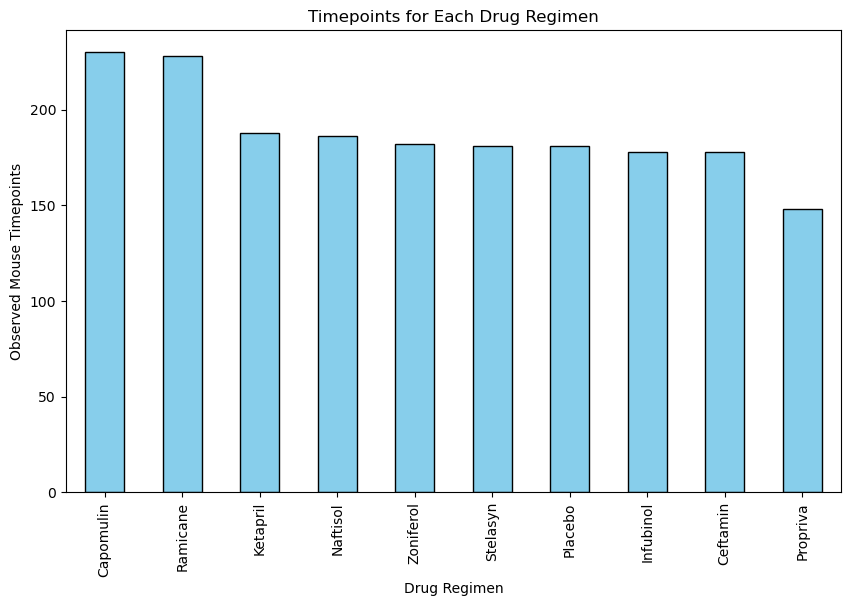

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group the data by 'Drug Regimen' and count the number of rows
count_per_regimen = clean_df['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
count_per_regimen.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Observed Mouse Timepoints')

# Show the plot
plt.show()


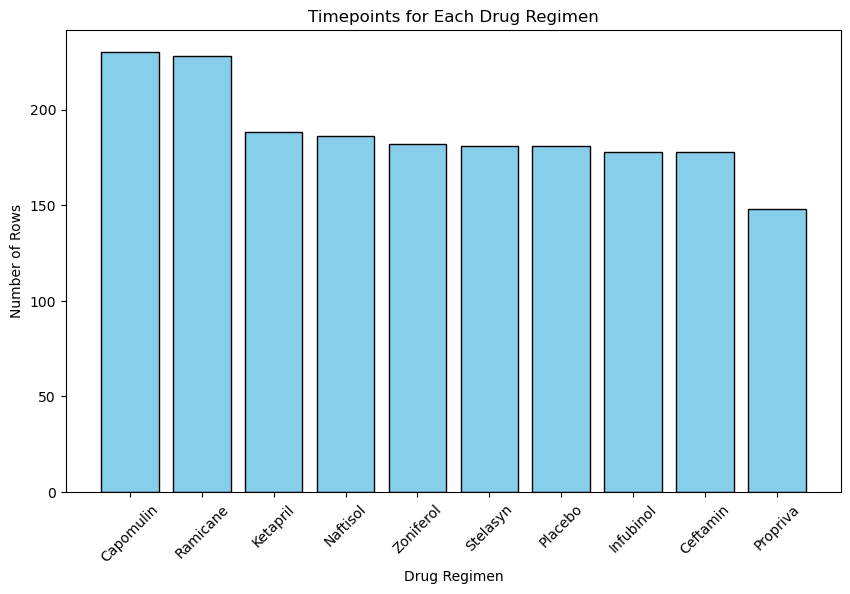

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group the data by 'Drug Regimen' and count the number of rows
regimen = clean_df['Drug Regimen'].value_counts()

# Create a bar plot using Matplotlib's pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen.index, regimen.values, color='skyblue', edgecolor='black')

# Set the title and labels
plt.title('Timepoints for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=45)

# Show the plot
plt.show()

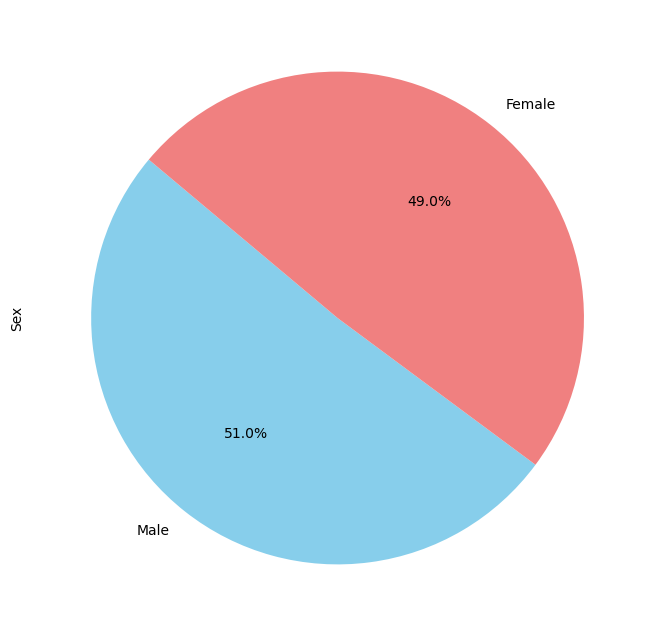

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of female and male mice
gender = clean_df['Sex'].value_counts()

# Create a pie plot using Pandas
gender.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=140, figsize=(8, 8))

plt.ylabel('Sex')

# Show the plot
plt.show()


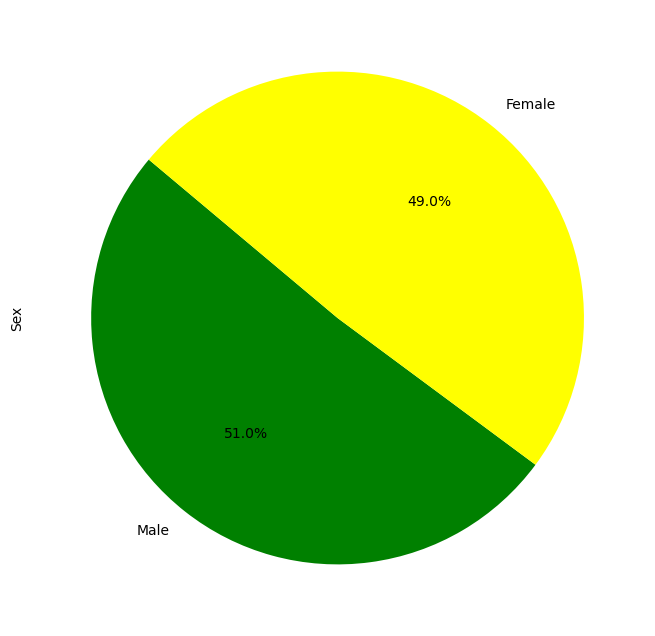

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of female and male mice
gender_dif = clean_df['Sex'].value_counts()

# Create a pie plot using Matplotlib's pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_dif, labels=gender_dif.index, autopct='%1.1f%%', colors=['green', 'yellow'], startangle=140)

# Set the y axis lable
plt.ylabel('Sex')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
#filtered_data = clean_df[clean_df['Drug Regimen'].isin(selected_regimens)]
# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = clean_df.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(final_timepoints, clean_df, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volumes.head(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [44]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_vol = final_tumor_volumes.loc[final_tumor_volumes['Drug Regimen'] == drug, 'Tumor Volume (mm3)'] 
    
    # add subset 
    tumor_vol.append(final_tumor_vol)

    #tumor_vol.extend(final_tumor_vol['Tumor Volume (mm3)'].tolist())
    #print(tumor_vol)
   # tumor_vol.append(final_tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor_vol.loc[(final_tumor_vol < lower_bound) | (final_tumor_vol > upper_bound)]
    print(f'({drug} potential outliers: {outliers})')

#sorted_vol = sorted(tumor_vol)
#sorted_vol

#volume_df = pd.DataFrame(sorted_vol, columns=["Total Volume (mm3)"])
#volume_df
                                       
  


#Q1 = volume_df['Total Volume (mm3)'].quantile(0.25)

# Calculate the third quartile (Q3)
#Q3 = volume_df['Total Volume (mm3)'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
#IQR = Q3 - Q1

#print("First Quartile (Q1):", Q1)
#print("Third Quartile (Q3):", Q3)
#print("Interquartile Range (IQR):", IQR)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


(Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))
(Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64)
(Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64))


<function matplotlib.pyplot.show(close=None, block=None)>

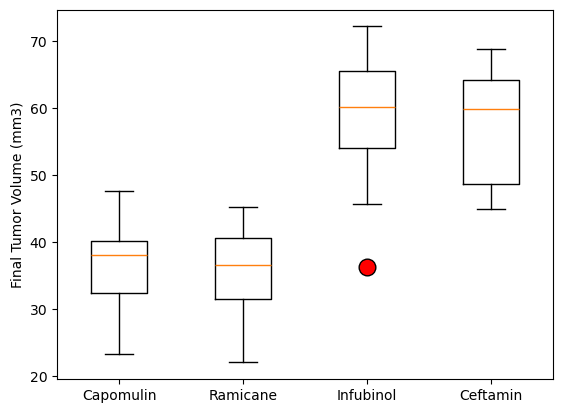

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_out = dict(markerfacecolor='red',markersize=12)
plt.boxplot(tumor_vol, labels = treatments, flierprops=red_out)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show

## Line and Scatter Plots

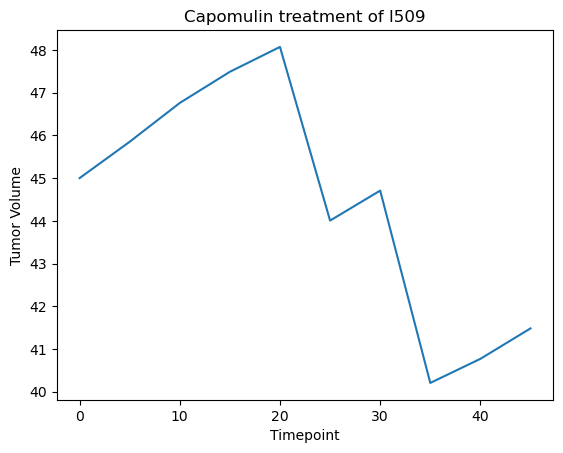

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_table = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
mousedata = capomulin_table.loc[capomulin_table["Mouse ID"] == 'l509']

plt.plot(mousedata['Timepoint'], mousedata['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Capomulin treatment of l509')
plt.show()




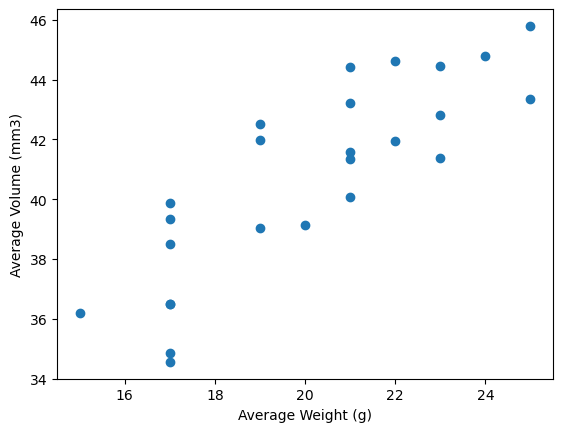

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_table_a = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_table_a.groupby(['Mouse ID'])[['Weight (g)', 'Tumor Volume (mm3)']].mean()
plt.scatter(capomulin_average['Weight (g)'], capomulin_average['Tumor Volume (mm3)'])
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Volume (mm3)')
plt.show()

## Correlation and Regression

The r-squared is: 0.7088568047708723


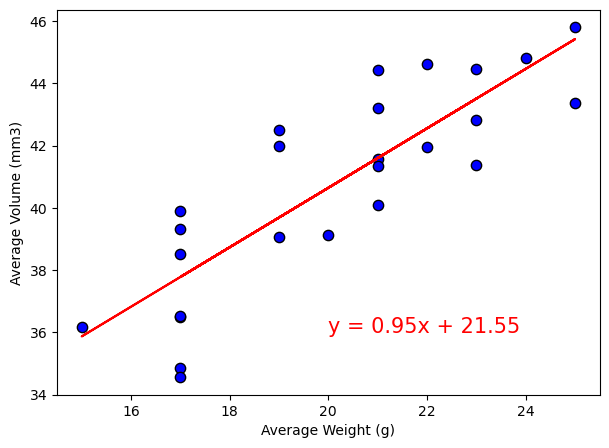

In [41]:
# Calculate the correlation coefficient and a linear regression model
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import sklearn.datasets as dta


# USING LINREGRESS
x_values = capomulin_average['Weight (g)']
y_values = capomulin_average['Tumor Volume (mm3)']

# makes the line of best fit
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept # calculate the predictions
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# make the plot
# Step 2: Make the canvas
plt.figure(figsize=(7, 5))

# Step 3: Make the basic plot
plt.scatter(x_values, y_values, facecolor="blue", edgecolor="black", s=55)
plt.plot(x_values, regress_values, "r-") # plot the line of best fit
plt.xlabel('Average Weight (g)')
plt.ylabel('Average Volume (mm3)')



plt.annotate(line_eq,(20, 36),fontsize=15,color="red")

print(f"The r-squared is: {rvalue**2}")
plt.show()


